In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [58]:
ansurm = pd.read_csv('../Datasets/ansur_male.csv')
ansurm.head()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240.0,440.0,1054.0,175.0,853.0,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225.0,371.0,1054.0,167.0,815.0,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255.0,411.0,1041.0,180.0,831.0,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205.0,399.0,968.0,176.0,793.0,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214.0,379.0,1245.0,188.0,954.0,94.6,1.914,25.823034,Overweight,Tall


In [59]:
ansurm_cat = ansurm[ansurm.columns[ansurm.dtypes==object]]

In [84]:
ansurm_num= ansurm[ansurm.columns[~(ansurm.dtypes==object)]]

In [61]:
ansurm.describe(exclude='number')

,Branch,Component,Gender,BMI_class,Height_class
count,1738,1738,1738,1737,1737
unique,3,3,1,3,3
top,Combat Service Support,Regular Army,Male,Overweight,Tall
freq,752,1132,1738,1326,937


In [62]:
ansurm.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
count,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.00000,1738.000000,...,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000
mean,260.380322,1442.732451,334.777906,229.927503,1331.073648,252.691024,199.218642,417.082278,360.99252,274.215765,...,330.631549,954.807714,241.194588,399.471503,1055.320668,177.199194,848.410478,86.628037,1.759089,27.942387
std,36.917993,63.084908,17.475606,14.497034,59.235479,12.744807,10.238686,18.900114,34.22097,17.475768,...,34.267972,109.124616,33.787458,28.014406,52.124764,8.544377,41.599766,14.303696,0.068734,3.978306
min,165.000000,1243.000000,281.000000,156.000000,1148.000000,186.000000,156.000000,337.000000,250.00000,220.000000,...,232.000000,648.000000,163.000000,313.000000,876.000000,149.000000,719.000000,39.300000,1.528000,15.351562
25%,234.000000,1403.000000,323.000000,220.000000,1293.000000,244.000000,192.000000,405.000000,337.00000,262.000000,...,306.000000,879.000000,217.000000,379.000000,1020.000000,172.000000,820.000000,76.600000,1.715000,25.200186
50%,258.000000,1440.500000,334.000000,229.000000,1330.000000,253.000000,199.000000,417.000000,361.00000,274.000000,...,331.000000,956.000000,239.000000,399.000000,1053.000000,177.000000,848.000000,86.000000,1.758000,27.885187
75%,285.000000,1484.000000,346.000000,240.000000,1367.750000,261.000000,206.000000,429.000000,383.00000,286.000000,...,353.000000,1029.000000,263.000000,418.000000,1089.000000,183.000000,875.000000,95.800000,1.804000,30.603370
max,451.000000,1648.000000,390.000000,283.000000,1535.000000,300.000000,234.000000,483.000000,490.00000,334.000000,...,459.000000,1379.000000,406.000000,494.000000,1245.000000,208.000000,990.000000,142.900000,1.970000,41.464723


In [63]:
ansurm_num.corr()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
abdominalextensiondepthsitting,1.000000,0.227269,0.153684,0.501506,0.140653,0.343280,0.178138,0.340469,0.625038,0.511399,...,0.862340,0.945799,0.965039,0.531210,-0.020706,0.471310,0.307880,0.823796,0.159496,0.864904
acromialheight,0.227269,1.000000,0.808843,0.391822,0.983629,0.477771,0.654142,0.509036,0.267047,0.549815,...,0.336796,0.301959,0.247230,0.480830,0.896518,0.532768,0.899482,0.544857,0.967815,0.104484
acromionradialelength,0.153684,0.808843,1.000000,0.261681,0.799870,0.363147,0.575480,0.466306,0.199389,0.409481,...,0.231178,0.213865,0.177830,0.271802,0.792666,0.426662,0.550019,0.421468,0.783703,0.059400
anklecircumference,0.501506,0.391822,0.261681,1.000000,0.337174,0.679105,0.500208,0.462930,0.578347,0.556727,...,0.597366,0.562913,0.497141,0.395700,0.279370,0.678198,0.422963,0.728903,0.388318,0.634008
axillaheight,0.140653,0.983629,0.799870,0.337174,1.000000,0.439355,0.655271,0.492715,0.200018,0.490098,...,0.243500,0.207742,0.159114,0.434294,0.918922,0.475491,0.869209,0.463551,0.969816,0.009347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wristcircumference,0.471310,0.532768,0.426662,0.678198,0.475491,0.665726,0.538532,0.569766,0.599466,0.537914,...,0.533147,0.527706,0.486598,0.423816,0.419288,1.000000,0.504078,0.718579,0.524056,0.548409
wristheight,0.307880,0.899482,0.550019,0.422963,0.869209,0.454805,0.536548,0.422759,0.303123,0.560444,...,0.404769,0.373618,0.317174,0.552567,0.738869,0.504078,1.000000,0.567567,0.863788,0.188558
weight_kg,0.823796,0.544857,0.421468,0.728903,0.463551,0.602118,0.469471,0.611691,0.813100,0.691078,...,0.873985,0.886271,0.826189,0.599386,0.342181,0.718579,0.567567,1.000000,0.498597,0.880136
stature_m,0.159496,0.967815,0.783703,0.388318,0.969816,0.472726,0.658077,0.542556,0.230376,0.527106,...,0.277267,0.233707,0.178627,0.477875,0.907366,0.524056,0.863788,0.498597,1.000000,0.033689


In [64]:
from sklearn.manifold import TSNE

In [65]:
tsne = TSNE(learning_rate = 70)

In [66]:
ansurm.dropna(inplace=True)

In [67]:
ansurm.isna().sum()

Branch                            0
Component                         0
Gender                            0
abdominalextensiondepthsitting    0
acromialheight                    0
                                 ..
weight_kg                         0
stature_m                         0
BMI                               0
BMI_class                         0
Height_class                      0
Length: 99, dtype: int64

In [68]:
ansurm.BMI = ansurm.BMI.round(2)

In [70]:
scaler = StandardScaler()

In [71]:
ansurm_nums1 = scaler.fit_transform(ansurm_num)
ansurm_nums = pd.DataFrame(ansurm_nums1)

In [72]:
ansurm_nums.dropna(inplace=True)

In [73]:
ansurm.drop('Gender', axis=1, inplace=True)

In [74]:
tsne_features = tsne.fit_transform(ansurm_nums)

C:\Users\l_san\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [75]:
ansurm['x'] = tsne_features[:,0]
ansurm['y'] = tsne_features[:,1]

In [76]:
list_columns = list(ansurm.columns[ansurm.dtypes==object])

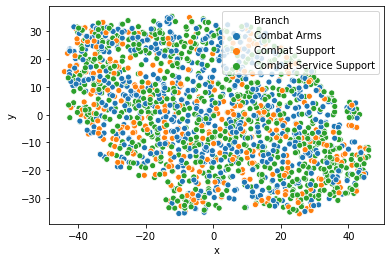

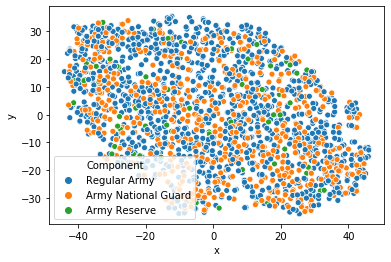

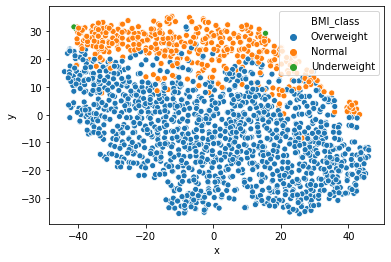

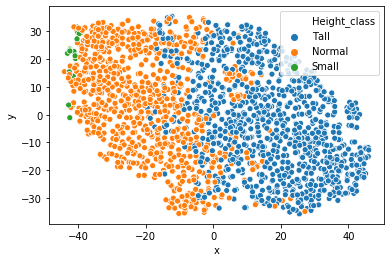

In [77]:
for f in list_columns:
    sns.scatterplot(data=ansurm, x='x', y='y', hue=f)
    plt.show()

In [78]:
from sklearn.feature_selection import VarianceThreshold

In [86]:
sel = VarianceThreshold(threshold=0.003)

In [87]:
sel.fit(ansurm_num/ansurm_num.mean())

VarianceThreshold(threshold=0.003)

In [99]:
mask = sel.get_support()

In [89]:
reduced_ansurm_num = ansurm_num.loc[:,mask]
reduced_ansurm_num.head()

,abdominalextensiondepthsitting,anklecircumference,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,buttockcircumference,buttockdepth,buttockheight,calfcircumference,...,tibialheight,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,weight_kg,BMI,x,y
0,266,222,369,274,493,71,979,240,882,373,...,491.0,501.0,329.0,933.0,240.0,440.0,81.5,25.84,-5.410636,4.271213
1,233,220,338,257,479,67,944,232,870,357,...,476.0,432.0,316.0,870.0,225.0,371.0,72.6,25.06,-12.753572,18.825581
2,287,230,408,261,544,75,1054,258,901,412,...,477.0,472.0,329.0,964.0,255.0,411.0,92.9,30.86,2.827997,-13.979428
3,234,230,359,262,518,73,991,242,821,395,...,445.0,461.0,315.0,857.0,205.0,399.0,79.4,28.99,-31.262011,1.695158
4,250,247,356,263,524,80,1029,275,1080,425,...,584.0,467.0,303.0,868.0,214.0,379.0,94.6,25.82,41.012409,-0.895102


In [90]:
np.shape(ansurm_num)

(1737, 96)

In [91]:
np.shape(reduced_ansurm_num)

(1737, 48)

In [100]:
mask2 = (reduced_ansurm_num.isna().sum() /len(reduced_ansurm_num) < 0.3)

In [101]:
reduced_ansurm_num = reduced_ansurm_num.loc[:,mask2]
reduced_ansurm_num.head()

,abdominalextensiondepthsitting,anklecircumference,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,buttockcircumference,buttockdepth,buttockheight,calfcircumference,...,tibialheight,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,weight_kg,BMI,x,y
0,266,222,369,274,493,71,979,240,882,373,...,491.0,501.0,329.0,933.0,240.0,440.0,81.5,25.84,-5.410636,4.271213
1,233,220,338,257,479,67,944,232,870,357,...,476.0,432.0,316.0,870.0,225.0,371.0,72.6,25.06,-12.753572,18.825581
2,287,230,408,261,544,75,1054,258,901,412,...,477.0,472.0,329.0,964.0,255.0,411.0,92.9,30.86,2.827997,-13.979428
3,234,230,359,262,518,73,991,242,821,395,...,445.0,461.0,315.0,857.0,205.0,399.0,79.4,28.99,-31.262011,1.695158
4,250,247,356,263,524,80,1029,275,1080,425,...,584.0,467.0,303.0,868.0,214.0,379.0,94.6,25.82,41.012409,-0.895102


In [94]:
np.shape(reduced_ansurm_num)

(1737, 48)

In [95]:
np.var(ansurm_num / ansurm_num.mean()).mean()

15086.097040501603

In [96]:
import seaborn as sns

In [97]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

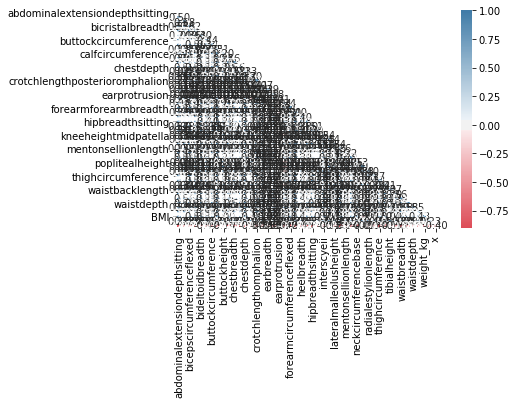

In [109]:
sns.heatmap(reduced_ansurm_num.corr(), center=0, cmap=cmap, linewidths=1, annot=True, fmt='.2f', mask=mask3)

In [107]:
corr= reduced_ansurm_num.corr()
corr

,abdominalextensiondepthsitting,anklecircumference,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,buttockcircumference,buttockdepth,buttockheight,calfcircumference,...,tibialheight,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,weight_kg,BMI,x,y
abdominalextensiondepthsitting,1.000000,0.501486,0.624866,0.511441,0.720193,0.236377,0.797366,0.832399,0.120407,0.652032,...,0.125274,0.537989,0.862340,0.945799,0.965039,0.531210,0.823796,0.864890,0.294823,-0.805261
anklecircumference,0.501486,1.000000,0.578369,0.556722,0.605782,0.640925,0.689669,0.625616,0.262643,0.818144,...,0.308678,0.378980,0.597366,0.562913,0.497141,0.395700,0.728903,0.633983,0.480800,-0.682213
bicepscircumferenceflexed,0.624866,0.578369,1.000000,0.423489,0.800441,0.362471,0.738419,0.700768,0.188541,0.692850,...,0.189804,0.346100,0.652823,0.669929,0.615440,0.369676,0.813100,0.814009,0.392431,-0.773634
bicristalbreadth,0.511441,0.556722,0.423489,1.000000,0.586390,0.427459,0.664045,0.559226,0.376743,0.542874,...,0.412214,0.564255,0.706775,0.628952,0.531156,0.509296,0.691078,0.510332,0.561267,-0.606256
bideltoidbreadth,0.720193,0.605782,0.800441,0.586390,1.000000,0.404389,0.812924,0.770410,0.269008,0.715131,...,0.287820,0.444269,0.779505,0.785718,0.722974,0.487375,0.885667,0.830707,0.503417,-0.847367
bimalleolarbreadth,0.236377,0.640925,0.362471,0.427459,0.404389,1.000000,0.438954,0.344757,0.365932,0.530828,...,0.411798,0.313396,0.323955,0.284635,0.228431,0.294664,0.501525,0.315403,0.546057,-0.418042
buttockcircumference,0.797366,0.689669,0.738419,0.664045,0.812924,0.438954,1.000000,0.902263,0.249625,0.789783,...,0.287291,0.524839,0.874447,0.869869,0.792546,0.519672,0.930544,0.871604,0.500849,-0.868846
buttockdepth,0.832399,0.625616,0.700768,0.559226,0.770410,0.344757,0.902263,1.000000,0.211784,0.748660,...,0.207125,0.489189,0.834393,0.862613,0.837167,0.490082,0.878692,0.880133,0.388000,-0.842994
buttockheight,0.120407,0.262643,0.188541,0.376743,0.269008,0.365932,0.249625,0.211784,1.000000,0.199932,...,0.923460,0.366679,0.167297,0.147255,0.141118,0.245141,0.385931,-0.004924,0.837871,-0.144824
calfcircumference,0.652032,0.818144,0.692850,0.542874,0.715131,0.530828,0.789783,0.748660,0.199932,1.000000,...,0.238588,0.401853,0.711513,0.704831,0.643687,0.439477,0.826216,0.793179,0.425381,-0.786698


In [108]:
mask3 = np.triu(np.ones_like(corr, dtype=bool))

In [103]:
mask3

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

In [110]:
corr_df = reduced_ansurm_num.corr().abs()

In [111]:
mask = np.triu(np.ones_like(corr_df, dtype=bool))

In [112]:
tri_df = corr_df.mask(mask)
tri_df.head()

,abdominalextensiondepthsitting,anklecircumference,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,buttockcircumference,buttockdepth,buttockheight,calfcircumference,...,tibialheight,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,weight_kg,BMI,x,y
abdominalextensiondepthsitting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anklecircumference,0.501486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bicepscircumferenceflexed,0.624866,0.578369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bicristalbreadth,0.511441,0.556722,0.423489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bideltoidbreadth,0.720193,0.605782,0.800441,0.58639,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
to_drop = [c for c in tri_df if any(tri_df[c]> 0.9)]
to_drop

['abdominalextensiondepthsitting',
 'buttockcircumference',
 'buttockheight',
 'chestcircumference',
 'crotchheight',
 'hipbreadth',
 'interscyei',
 'kneeheightmidpatella',
 'neckcircumference',
 'poplitealheight',
 'thighcircumference',
 'waistbreadth',
 'waistcircumference',
 'BMI']

In [114]:
reduced2_ansurm_num = reduced_ansurm_num.drop(to_drop, axis=1)

In [115]:
np.shape(reduced2_ansurm_num)

(1737, 34)

In [116]:
np.shape(reduced_ansurm_num)

(1737, 48)

In [117]:
pip install seaborn==0.10.0.rc0

Note: you may need to restart the kernel to use updated packages.


In [118]:
import seaborn as sns

In [119]:
X= reduced2_ansurm_num.values

In [121]:
ansurm_cat.head(1)

,Branch,Component,Gender,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,Overweight,Tall


In [124]:
ansurm_cat.dropna(inplace=True)

C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [145]:
y= ansurm_cat['Height_class'].values

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [147]:
scaler3= StandardScaler()

In [148]:
X_train_std= scaler.fit_transform(X_train)

In [149]:
X_test_std = scaler.transform(X_test)

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [151]:
lr = LogisticRegression()

In [152]:
lr.fit(X_train_std, y_train)

C:\Users\l_san\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [153]:
lr.score(X_test_std, y_test)

0.903448275862069

In [171]:
dic = dict(zip(reduced_ansurm_num.columns, abs(lr.coef_[0])))

In [178]:
sorted(dic.items(), key=lambda x:x[1])

[('earbreadth', 0.010769271098313183),
 ('heelbreadth', 0.017102427326138463),
 ('chestdepth', 0.02098844697896304),
 ('earlength', 0.032384107809042294),
 ('crotchheight', 0.04595440571120023),
 ('chestcircumference', 0.050208695261461586),
 ('buttockcircumference', 0.07292008844176265),
 ('kneeheightmidpatella', 0.07434039419337261),
 ('mentonsellionlength', 0.08298338286583748),
 ('elbowrestheight', 0.0880554820886109),
 ('buttockdepth', 0.10278824847238896),
 ('buttockheight', 0.1373495858093475),
 ('bicepscircumferenceflexed', 0.14319890195915602),
 ('interscyeii', 0.19736308921036957),
 ('lateralmalleolusheight', 0.20564709299684295),
 ('anklecircumference', 0.20665208328253773),
 ('hipbreadth', 0.2199063995756203),
 ('forearmforearmbreadth', 0.24227209361770496),
 ('abdominalextensiondepthsitting', 0.26477079207977605),
 ('bicristalbreadth', 0.27241777807475803),
 ('crotchlengthomphalion', 0.30314267999033395),
 ('interscyei', 0.3171145456645787),
 ('crotchlengthposterioromphali

In [179]:
from sklearn.feature_selection import RFE

In [182]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=12, verbose=1, step=5)

In [187]:
X_train_std = pd.DataFrame(X_train_std, columns=reduced2_ansurm_num.columns)

In [188]:
rfe.fit(X_train_std, y_train)

Fitting estimator with 34 features.
Fitting estimator with 29 features.


C:\Users\l_san\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\l_san\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Fitting estimator with 24 features.
Fitting estimator with 19 features.


C:\Users\l_san\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\l_san\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Fitting estimator with 14 features.


RFE(estimator=LogisticRegression(), n_features_to_select=12, step=5, verbose=1)

In [190]:
rfe.support_

array([False, False, False, False, False,  True,  True, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
        True,  True, False,  True,  True,  True, False])

In [189]:
X_train_std.columns[rfe.support_]

Index(['buttockdepth', 'calfcircumference', 'chestdepth',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion',
       'lateralmalleolusheight', 'radialestylionlength', 'tibialheight',
       'waistbacklength', 'waistfrontlengthsitting', 'weight_kg', 'x'],
      dtype='object')

In [193]:
ranking = dict(zip(X_train_std.columns, rfe.ranking_))
ranking

{'anklecircumference': 4,
 'bicepscircumferenceflexed': 4,
 'bicristalbreadth': 3,
 'bideltoidbreadth': 3,
 'bimalleolarbreadth': 2,
 'buttockdepth': 1,
 'calfcircumference': 1,
 'chestbreadth': 5,
 'chestdepth': 1,
 'crotchlengthomphalion': 1,
 'crotchlengthposterioromphalion': 1,
 'earbreadth': 6,
 'earlength': 6,
 'earprotrusion': 6,
 'elbowrestheight': 4,
 'forearmcircumferenceflexed': 4,
 'forearmforearmbreadth': 6,
 'heelbreadth': 5,
 'hipbreadthsitting': 3,
 'interscyeii': 5,
 'lateralmalleolusheight': 1,
 'lowerthighcircumference': 4,
 'mentonsellionlength': 6,
 'neckcircumferencebase': 5,
 'radialestylionlength': 1,
 'shoulderlength': 3,
 'thighclearance': 5,
 'tibialheight': 1,
 'waistbacklength': 1,
 'waistdepth': 2,
 'waistfrontlengthsitting': 1,
 'weight_kg': 1,
 'x': 1,
 'y': 3}

In [194]:
rfe.score(X_test_std, y_test)

C:\Users\l_san\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  "X does not have valid feature names, but"


0.8896551724137931

In [196]:
y2 = ansurm['BMI'].values

In [197]:
X2= ansurm_num.drop('BMI', axis=1).values

In [199]:
from sklearn.linear_model import Lasso

In [200]:
lasso = Lasso(alpha=0.5)

In [201]:
X2_train,X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.25)

In [206]:
X2_train= pd.DataFrame(X2_train, columns=ansurm_num.columns.drop('BMI'))

In [202]:
lasso.fit(X2_train,y2_train)

Lasso(alpha=0.5)

In [203]:
lasso.coef_

array([ 1.49423608e-03, -0.00000000e+00,  0.00000000e+00,  3.91057827e-03,
       -1.41070446e-03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        8.25046619e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.31177014e-03,  0.00000000e+00,  0.00000000e+00,  5.67371543e-03,
        2.22479063e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        9.46650371e-03, -6.20666113e-03, -0.00000000e+00,  6.45374759e-03,
        1.37180603e-03, -0.00000000e+00, -0.00000000e+00,  2.77597834e-04,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.81825494e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.29945288e-03,  2.57250598e-04,  0.00000000e+00,
       -1.71122054e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.53310700e-03,  0.00000000e+00,  1.63727018e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -6.35586121e-03,
        0.00000000e+00,  

In [207]:
dict(zip(X2_train.columns, lasso.coef_))

{'abdominalextensiondepthsitting': 0.0014942360773057824,
 'acromialheight': -0.0,
 'acromionradialelength': 0.0,
 'anklecircumference': 0.003910578266380694,
 'axillaheight': -0.00141070445958732,
 'balloffootcircumference': 0.0,
 'balloffootlength': 0.0,
 'biacromialbreadth': -0.0,
 'bicepscircumferenceflexed': 0.00825046619458965,
 'bicristalbreadth': 0.0,
 'bideltoidbreadth': 0.0,
 'bimalleolarbreadth': 0.0,
 'bitragionchinarc': 0.0013117701382150424,
 'bitragionsubmandibulararc': 0.0,
 'bizygomaticbreadth': 0.0,
 'buttockcircumference': 0.005673715425831698,
 'buttockdepth': 0.0022247906294422626,
 'buttockheight': 0.0,
 'buttockkneelength': 0.0,
 'buttockpopliteallength': 0.0,
 'calfcircumference': 0.009466503708596405,
 'cervicaleheight': -0.0062066611284018,
 'chestbreadth': -0.0,
 'chestcircumference': 0.006453747589131672,
 'chestdepth': 0.0013718060284350507,
 'chestheight': -0.0,
 'crotchheight': -0.0,
 'crotchlengthomphalion': 0.00027759783384415077,
 'crotchlengthposterio

In [224]:
X2_train.columns[(lasso.coef_ == 0)]

Index(['acromialheight', 'acromionradialelength', 'balloffootcircumference',
       'balloffootlength', 'biacromialbreadth', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockheight', 'buttockkneelength',
       'buttockpopliteallength', 'chestbreadth', 'chestheight', 'crotchheight',
       'crotchlengthposterioromphalion', 'earbreadth', 'earlength',
       'earprotrusion', 'eyeheightsitting', 'footbreadthhorizontal',
       'footlength', 'forearmcenterofgriplength', 'forearmhandlength',
       'handbreadth', 'handcircumference', 'handlength', 'headbreadth',
       'headlength', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting',
       'interpupillarybreadth', 'interscyei', 'interscyeii',
       'kneeheightsitting', 'lateralfemoralepicondyleheight',
       'lateralmalleolusheight', 'mentonsellionlength',
       'neckcircumferencebase', 'palmlength', 'radialestylionlength',
       'shoulderelbowlength', 

In [208]:
from sklearn.feature_selection import RFE

In [211]:
rfe= RFE(estimator=Lasso(), n_features_to_select=10, step=3)

In [212]:
rfe.fit(X2_train,y2_train)

RFE(estimator=Lasso(), n_features_to_select=10, step=3)

In [217]:
rfe.ranking_

array([ 5, 11, 11,  4, 10, 10,  9,  9,  1,  8,  8, 11,  7, 12, 12,  1,  5,
        7, 17, 18,  1,  3, 19,  1, 21, 21, 22, 20, 23, 13, 25, 25, 14, 15,
       24, 28, 29,  4,  6, 26, 26, 27, 27, 24, 27,  5, 26,  6, 24, 30, 30,
        1,  7, 16, 16, 17, 17, 12,  8,  1, 15,  1, 14,  6, 15, 13, 22,  3,
       23, 13,  1, 18, 28, 19,  3, 20,  1, 19, 18, 16,  9, 29,  4, 14, 10,
        1,  2, 20, 21, 22, 23, 25, 28, 29, 30])

In [219]:
dict(zip(X2_train.columns, rfe.ranking_))

{'abdominalextensiondepthsitting': 5,
 'acromialheight': 11,
 'acromionradialelength': 11,
 'anklecircumference': 4,
 'axillaheight': 10,
 'balloffootcircumference': 10,
 'balloffootlength': 9,
 'biacromialbreadth': 9,
 'bicepscircumferenceflexed': 1,
 'bicristalbreadth': 8,
 'bideltoidbreadth': 8,
 'bimalleolarbreadth': 11,
 'bitragionchinarc': 7,
 'bitragionsubmandibulararc': 12,
 'bizygomaticbreadth': 12,
 'buttockcircumference': 1,
 'buttockdepth': 5,
 'buttockheight': 7,
 'buttockkneelength': 17,
 'buttockpopliteallength': 18,
 'calfcircumference': 1,
 'cervicaleheight': 3,
 'chestbreadth': 19,
 'chestcircumference': 1,
 'chestdepth': 21,
 'chestheight': 21,
 'crotchheight': 22,
 'crotchlengthomphalion': 20,
 'crotchlengthposterioromphalion': 23,
 'earbreadth': 13,
 'earlength': 25,
 'earprotrusion': 25,
 'elbowrestheight': 14,
 'eyeheightsitting': 15,
 'footbreadthhorizontal': 24,
 'footlength': 28,
 'forearmcenterofgriplength': 29,
 'forearmcircumferenceflexed': 4,
 'forearmfore

In [220]:
X2_train.columns[rfe.support_]

Index(['bicepscircumferenceflexed', 'buttockcircumference',
       'calfcircumference', 'chestcircumference', 'iliocristaleheight',
       'lowerthighcircumference', 'neckcircumference', 'sittingheight',
       'thighcircumference', 'waistcircumference'],
      dtype='object')

In [221]:
rfe.score(X2_test,y2_test)

C:\Users\l_san\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  "X does not have valid feature names, but"


0.9771061670064094

In [222]:
rfe.score(X2_train,y2_train)

0.981287864324361

In [225]:
lasso2 = LassoCV()

In [226]:
lasso2.fit(X2_train,y2_train)

LassoCV()

In [227]:
lasso2.alpha_

0.3987556417280752

In [228]:
lasso2.score(X2_test,y2_test)

C:\Users\l_san\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  "X does not have valid feature names, but"


0.9896366984631266

In [229]:
mask4 = (lasso2.coef_ !=0)

In [230]:
rX2_train = X2_train.loc[:,mask4]